## EuroRoads

By: Karina Campos Almeida

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities


In [2]:
network_file = 'out.subelj_euroroad_euroroad'
names_file = 'ent.subelj_euroroad_euroroad.city.name'

In [3]:
edges = []
with open(network_file, 'r') as f:
    for line in f:
        if line.startswith('%'):
            continue
        u, v = map(int, line.split())
        edges.append((u, v))

node_names = []
with open(names_file, 'r') as f:
    for line in f:
        node_names.append(line.strip())

In [4]:
G = nx.Graph()
G.add_edges_from(edges)

In [5]:
name_mapping = {i+1: name for i, name in enumerate(node_names)}
G = nx.relabel_nodes(G, name_mapping)

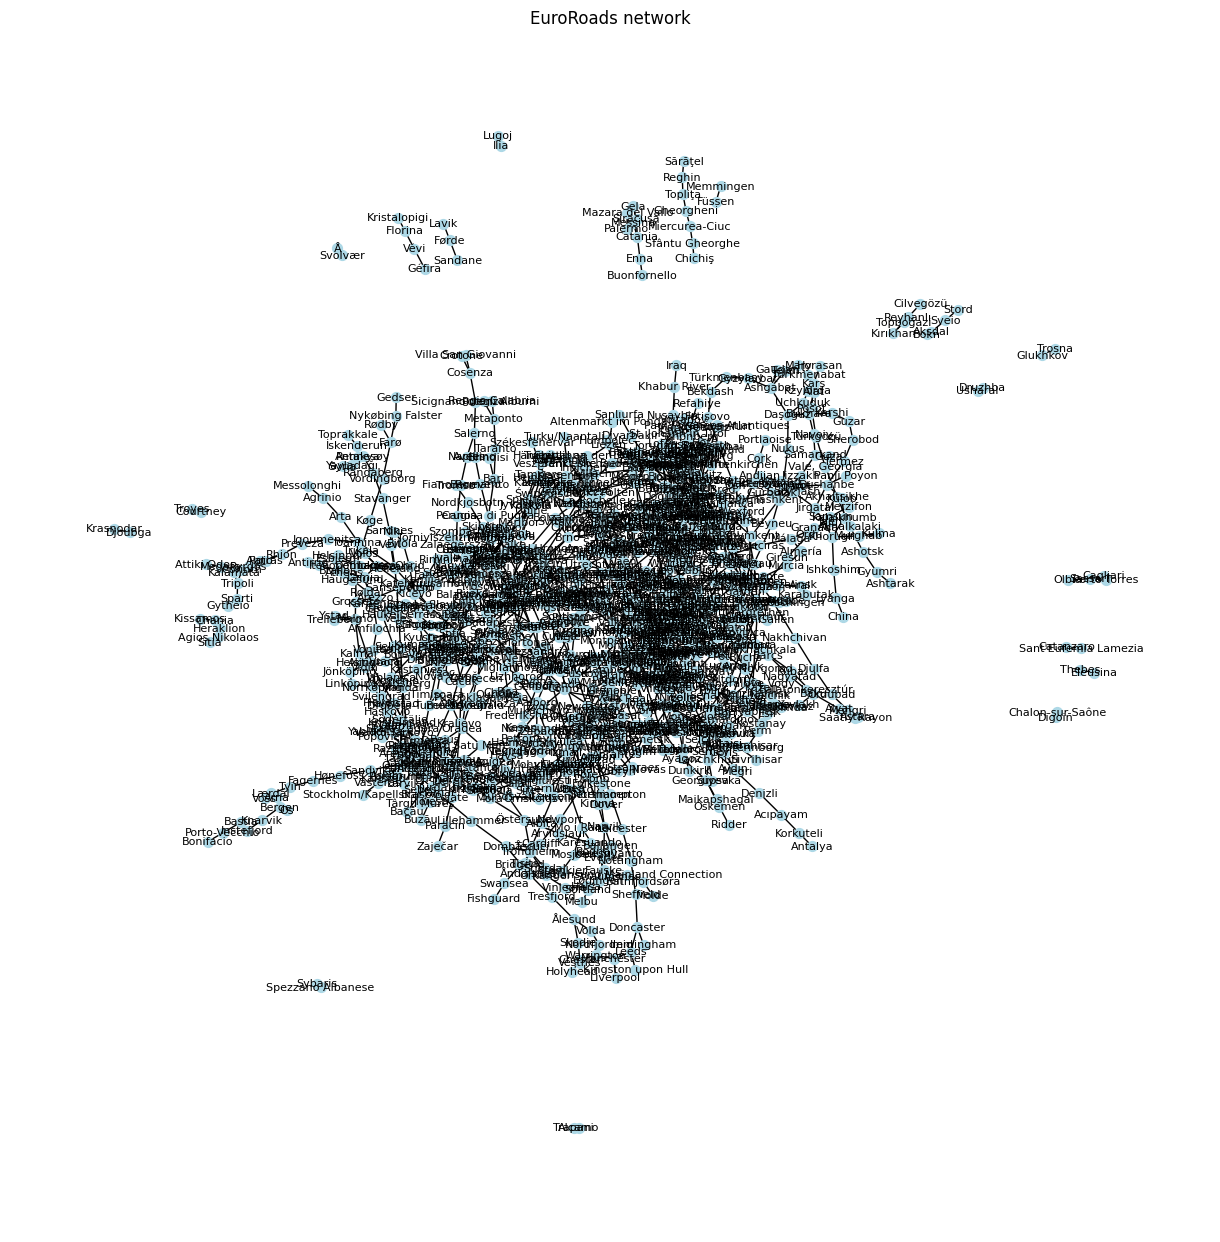

In [6]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, font_color='black', node_color='lightblue')
plt.title("EuroRoads network")
plt.show()

In [7]:
undirected = nx.is_directed(G)
bipartite = nx.is_bipartite(G)
planar, _ = nx.check_planarity(G)

In [8]:
{
    "Undirected": not undirected,
    "Bipartite": bipartite,
    "Planar": planar
}

{'Undirected': True, 'Bipartite': False, 'Planar': False}

## Network Characteristics

In [9]:
size_of_network = G.number_of_nodes()
number_of_links = G.number_of_edges()
clustering_coefficient = nx.average_clustering(G)

# Diameter - considering only connected components
eccentricity = {node: nx.eccentricity(G.subgraph(c))[node] 
                for c in nx.connected_components(G) for node in c}
diameter = max(eccentricity.values())

radius = min(eccentricity.values())
periphery = [node for node, ecc in eccentricity.items() if ecc == diameter]
center = [node for node, ecc in eccentricity.items() if ecc == radius]

# Sample of eccentricity
eccentricity_sample = dict(list(eccentricity.items())[:5])

In [10]:
{
    "Size of Network": size_of_network,
    "Number of Links": number_of_links,
    "Clustering Coefficient": clustering_coefficient,
    "Diameter": diameter,
    "Eccentricity (sample)": eccentricity_sample,
    "Radius": radius,
    "Periphery": periphery,
    "Center": center
}

{'Size of Network': 1174,
 'Number of Links': 1417,
 'Clustering Coefficient': 0.016731564857629593,
 'Diameter': 62,
 'Eccentricity (sample)': {'Sheffield': 10,
  'Newport': 12,
  'Ipswich': 12,
  'Dover': 12,
  'Glasgow': 13},
 'Radius': 1,
 'Periphery': ['Rennesøy', 'Gytheio'],
 'Center': ['Porto-Vecchio',
  'Sassari',
  'Svolvær',
  'Å',
  'Førde',
  'Druzhba',
  'Usharal',
  'Glukhkov',
  'Trosna',
  'Courtney',
  'Troyes',
  'Memmingen',
  'Füssen',
  'Djoubga',
  'Krasnodar',
  'Chalon-sur-Saône',
  'Digoin',
  'Ilia',
  'Lugoj',
  'Sybaris',
  'Spezzano Albanese',
  'Catanzaro',
  "Sant'Eufemia Lamezia",
  'Alcamo',
  'Trapani',
  'Eleusina',
  'Thebes']}

## Centrality Measures

In [11]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

In [12]:
#Preparing the results for sample nodes (top 5 by each centrality measure)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [13]:
{
    "Top Degree Centrality": top_degree,
    "Top Betweenness Centrality": top_betweenness,
    "Top Closeness Centrality": top_closeness,
    "Top Eigenvector Centrality": top_eigenvector
}


{'Top Degree Centrality': [('Moscow', 0.008525149190110827),
  ('Paris', 0.0068201193520886615),
  ('Liège', 0.0068201193520886615),
  ('Berlin', 0.0068201193520886615),
  ('Munich', 0.0068201193520886615)],
 'Top Betweenness Centrality': [('Brest', 0.2147942968768321),
  ('Moscow', 0.21251520234235025),
  ('Saint Petersburg', 0.19546510853156432),
  ('Le Mans', 0.17511179543874308),
  ('Rennes', 0.17436583708163728)],
 'Top Closeness Centrality': [('Warsaw', 0.076865027983178),
  ('Brest', 0.07677508228008835),
  ('Minsk', 0.07539498353434926),
  ('Lviv', 0.07408752092264696),
  ('Lublin', 0.0740337780606897)],
 'Top Eigenvector Centrality': [('Paris', 0.36511651698060815),
  ('Metz', 0.3002241061798406),
  ('Reims', 0.2807572358876249),
  ('Brussels', 0.2362520019996283),
  ('Liège', 0.20596898399503158)]}

In [23]:
def highlight_and_zoom(G, pos, highlight_nodes, radius=2):
    for node in highlight_nodes:
        neighbors = nx.single_source_shortest_path_length(G, node, cutoff=radius).keys()
        
        subgraph = G.subgraph(neighbors)
        
        plt.figure(figsize=(8, 8))
        sub_pos = {n: pos[n] for n in subgraph.nodes()}
        nx.draw(subgraph, sub_pos, with_labels=True, node_size=50, font_size=8, font_color='black', node_color='lightblue')
        nx.draw_networkx_nodes(subgraph, sub_pos, nodelist=[node], node_size=100, node_color='red')
        plt.title(f"Zoom on {node}")
        plt.show()

In [22]:
DC_nodes = ["Moscow", "Paris", "Liège", "Berlin", "Munich"]


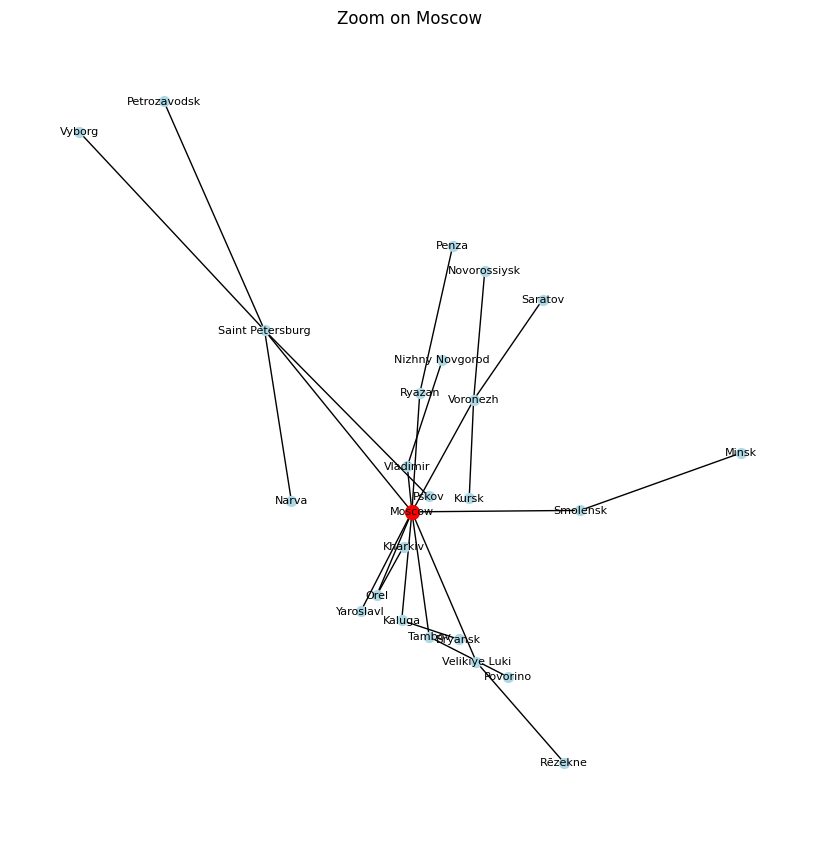

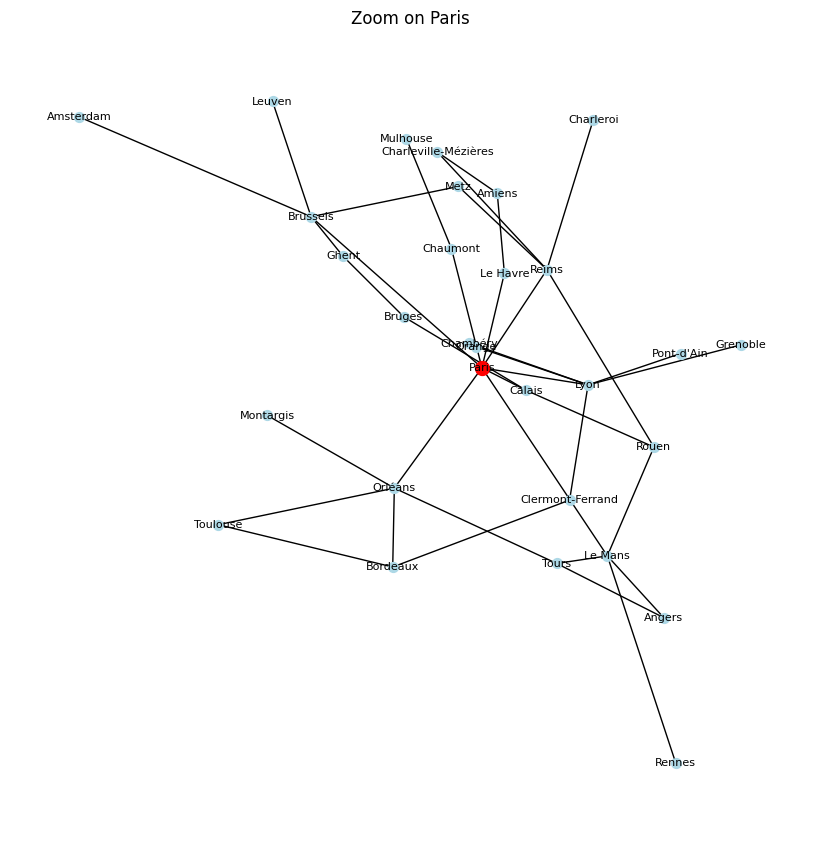

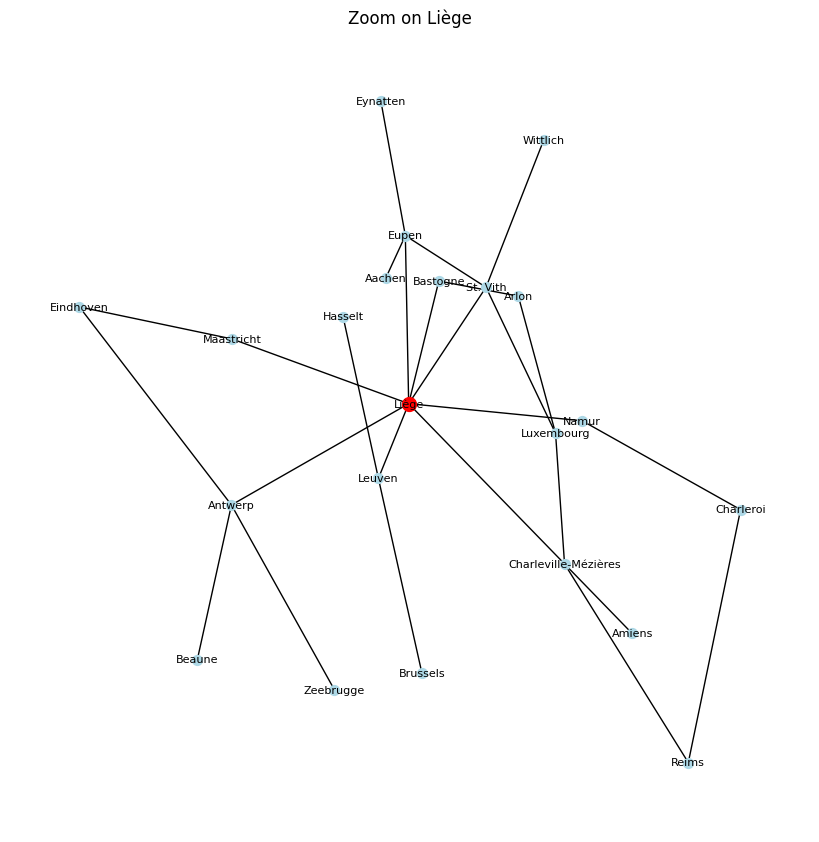

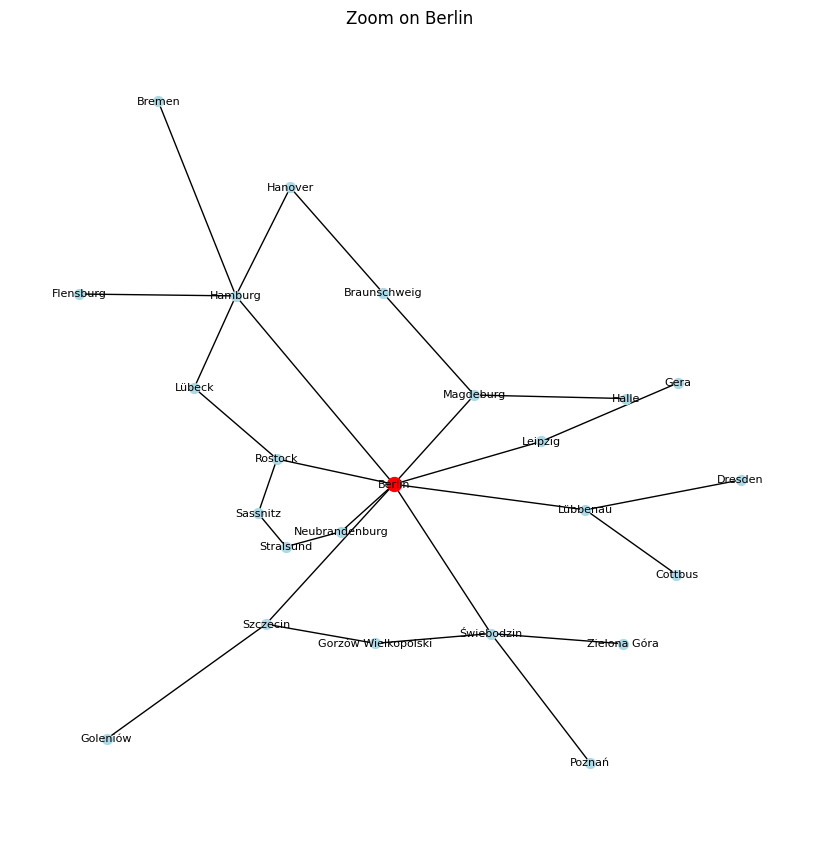

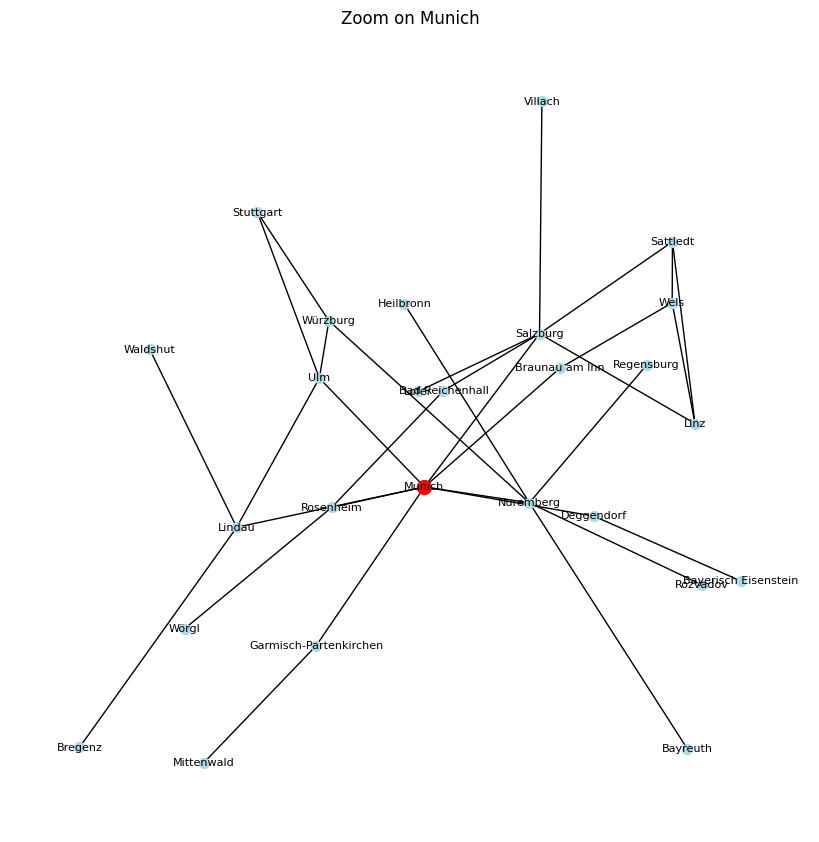

In [24]:
highlight_and_zoom(G, pos, DC_nodes)


In [28]:
BC_nodes = ["Brest", "Moscow", "Saint Petersburg", "Le Mans", "Rennes"]

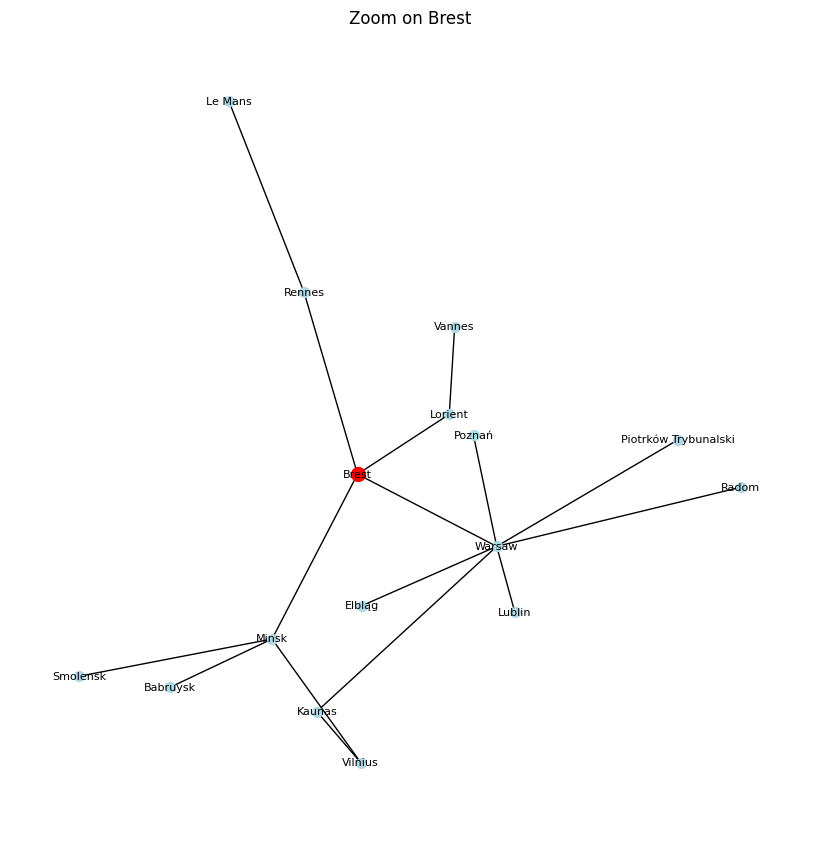

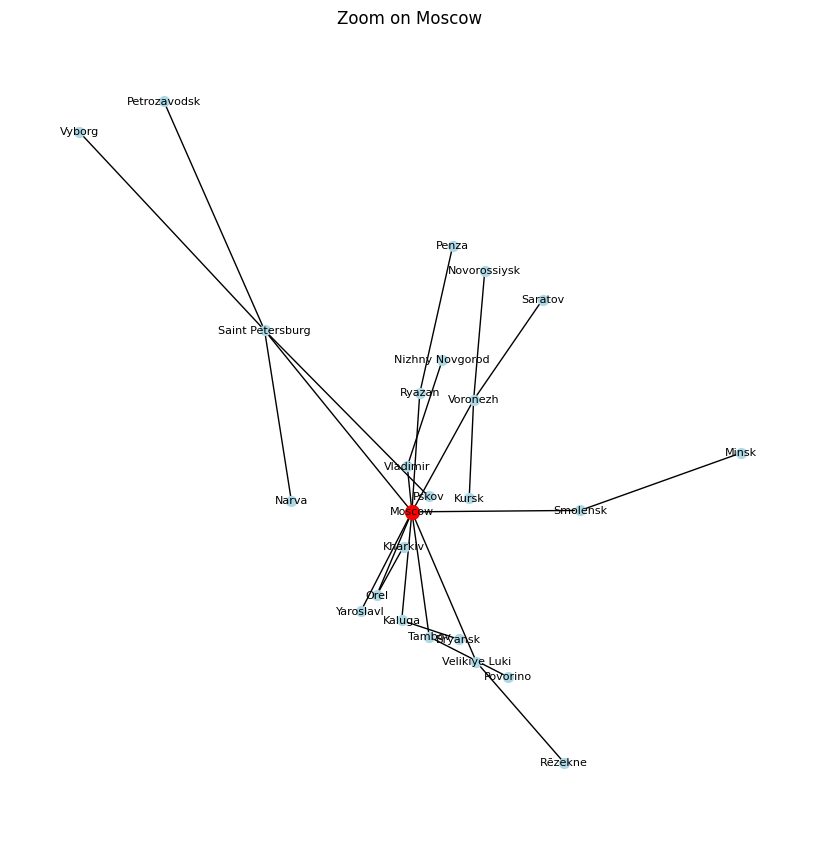

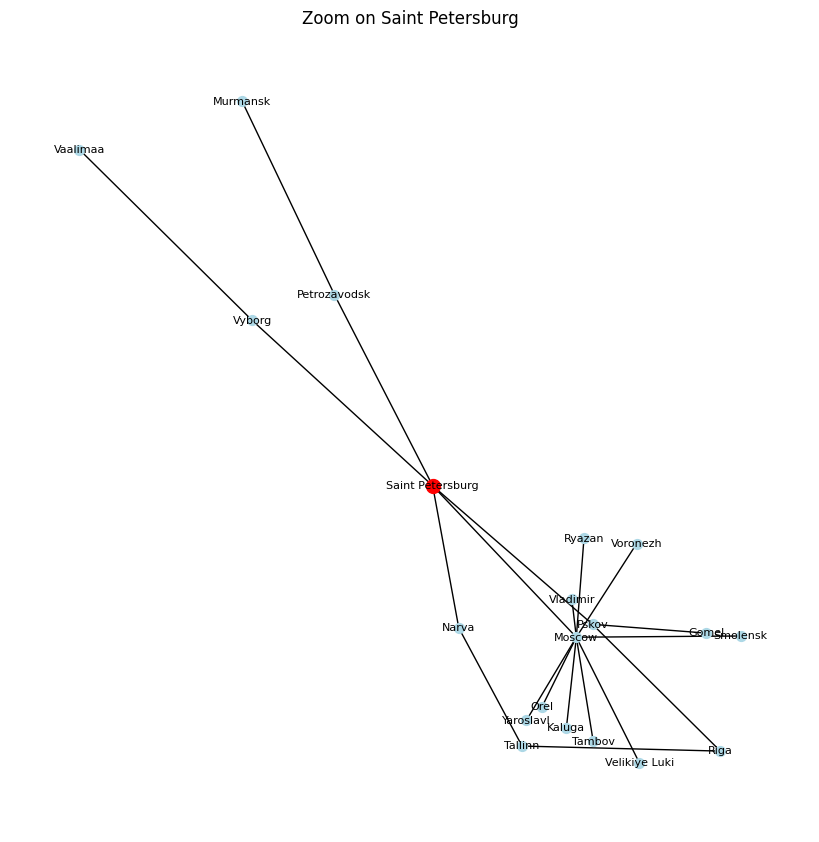

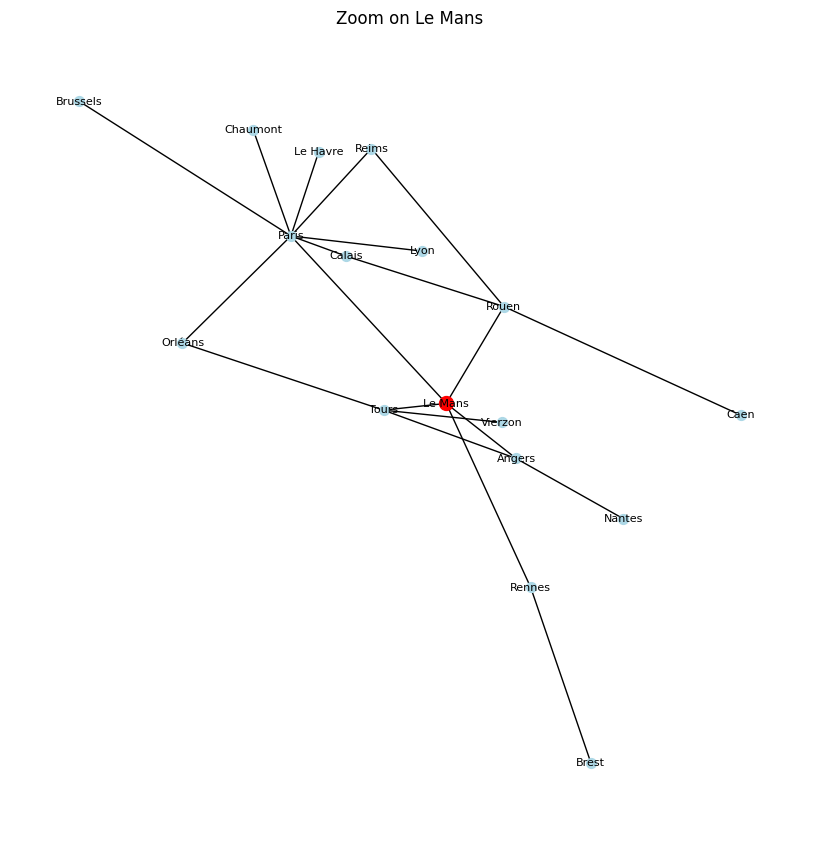

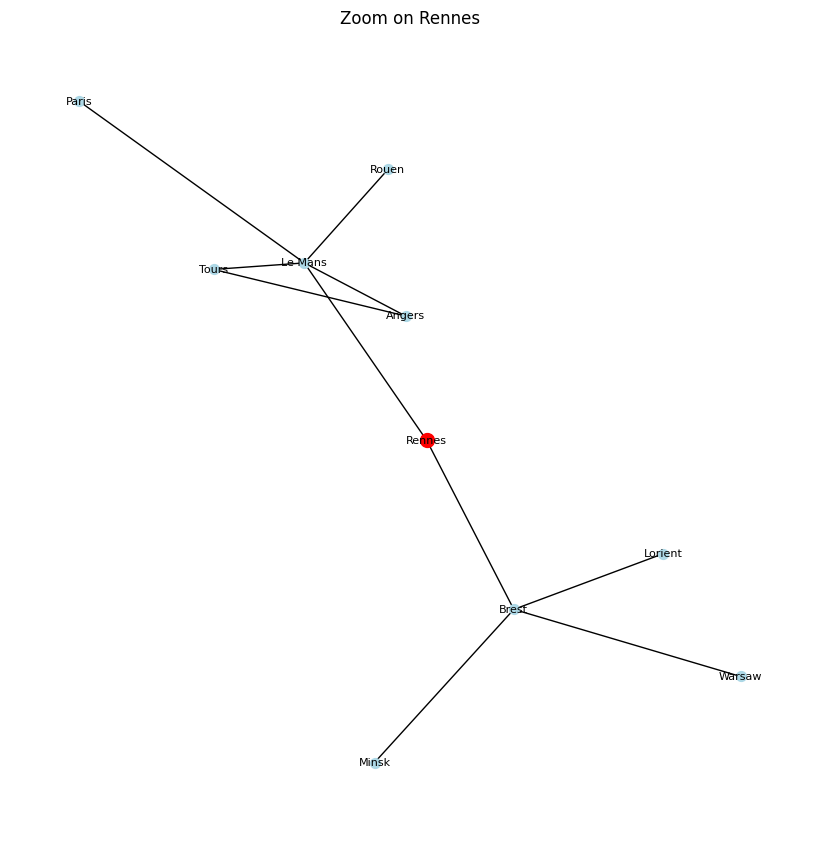

In [29]:
highlight_and_zoom(G, pos, BC_nodes)


In [30]:
CC_nodes = ["Warsaw", "Brest", "Minsk", "Lviv", "Lublin"]

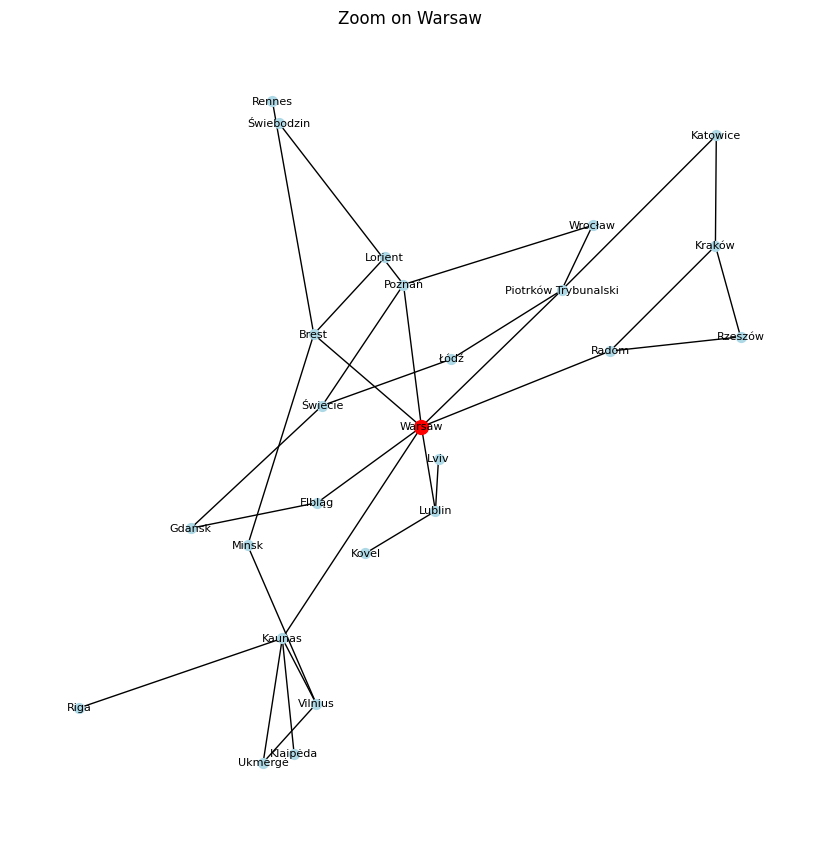

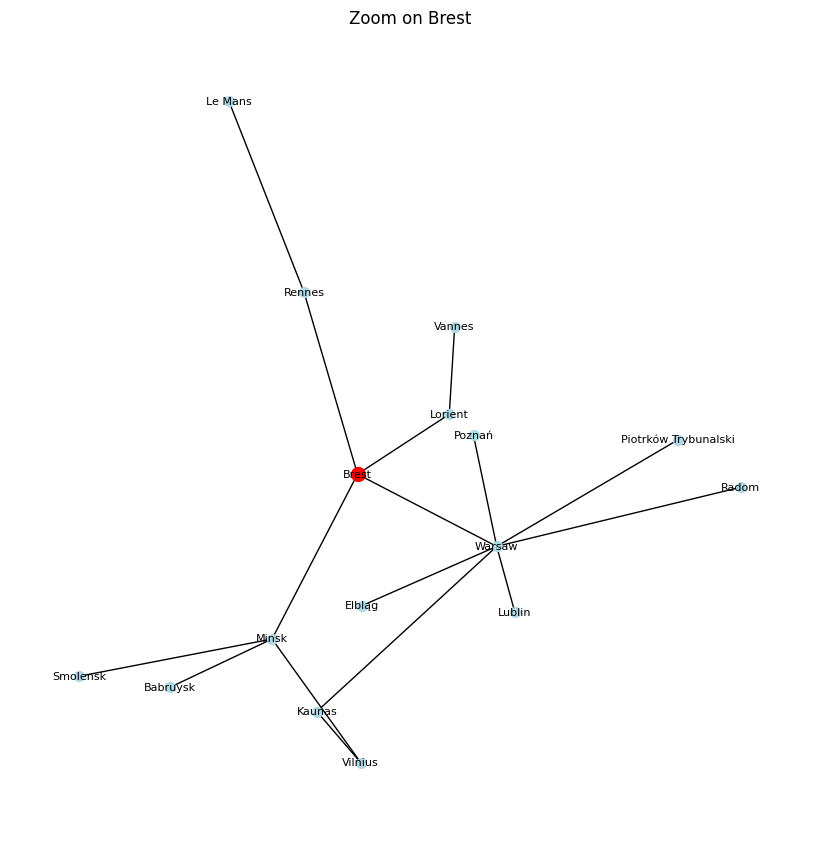

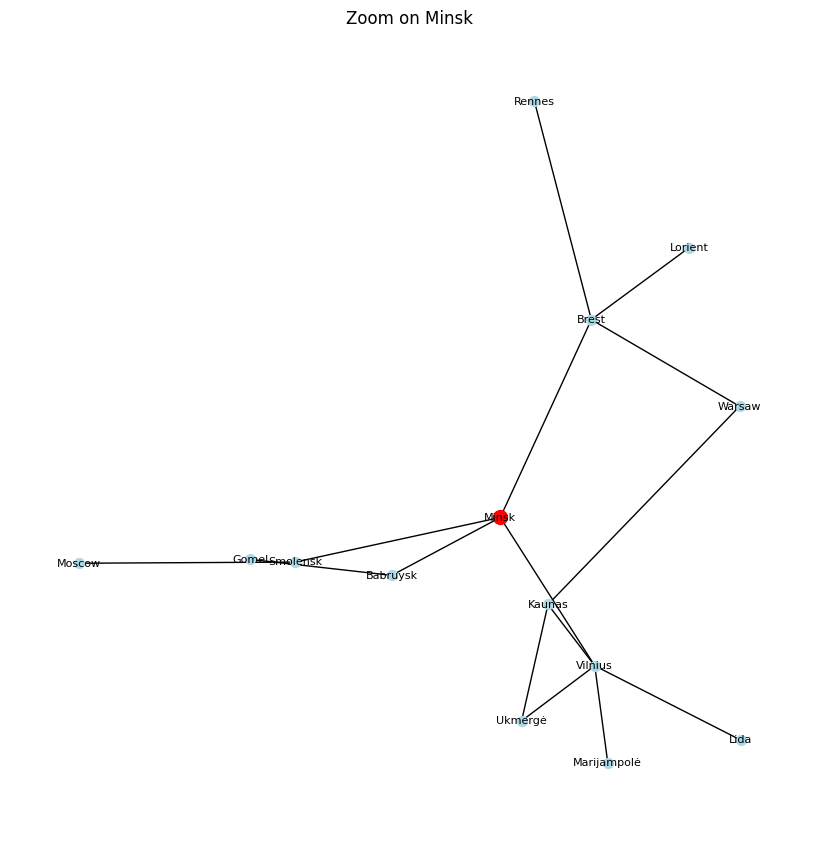

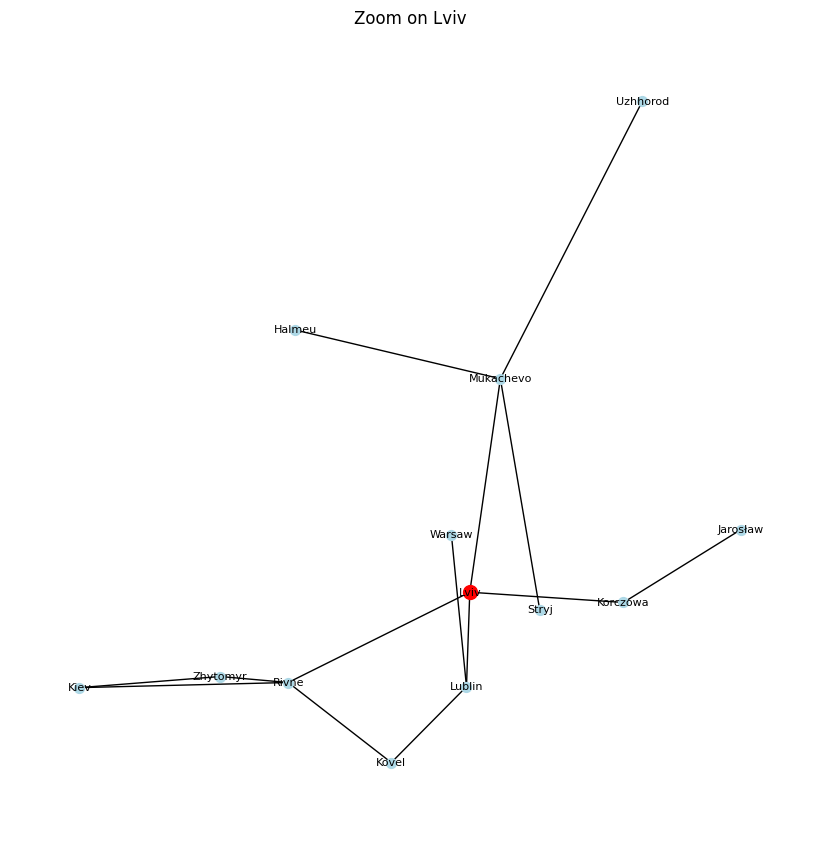

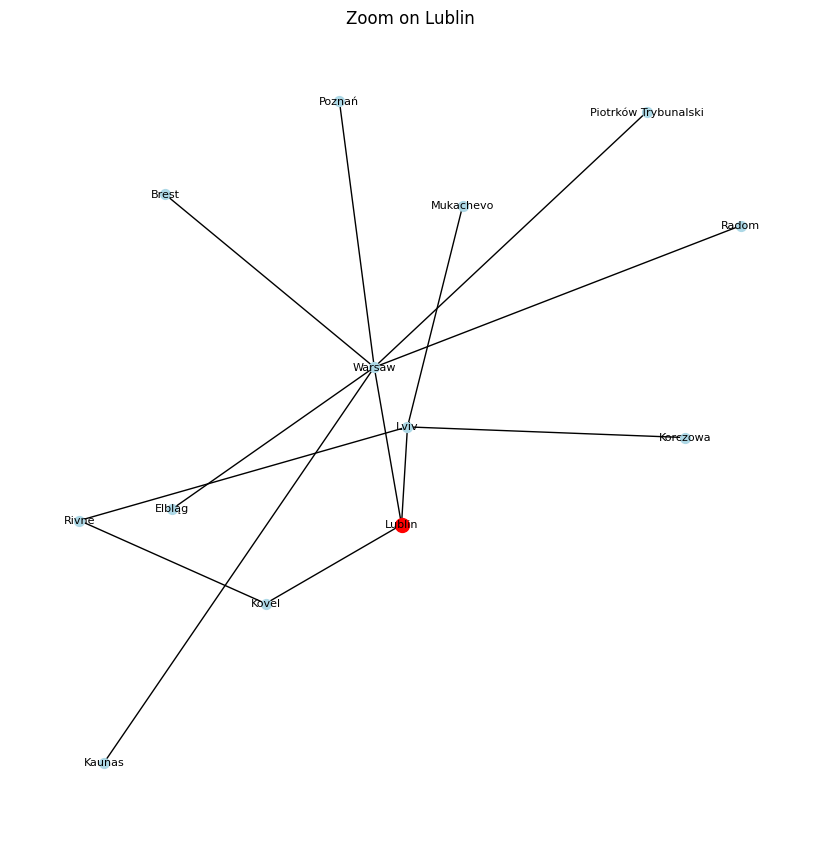

In [31]:
highlight_and_zoom(G, pos, CC_nodes)

In [32]:
EC_nodes = ["Paris", "Metz", "Reims", "Brussels", "Liège"]

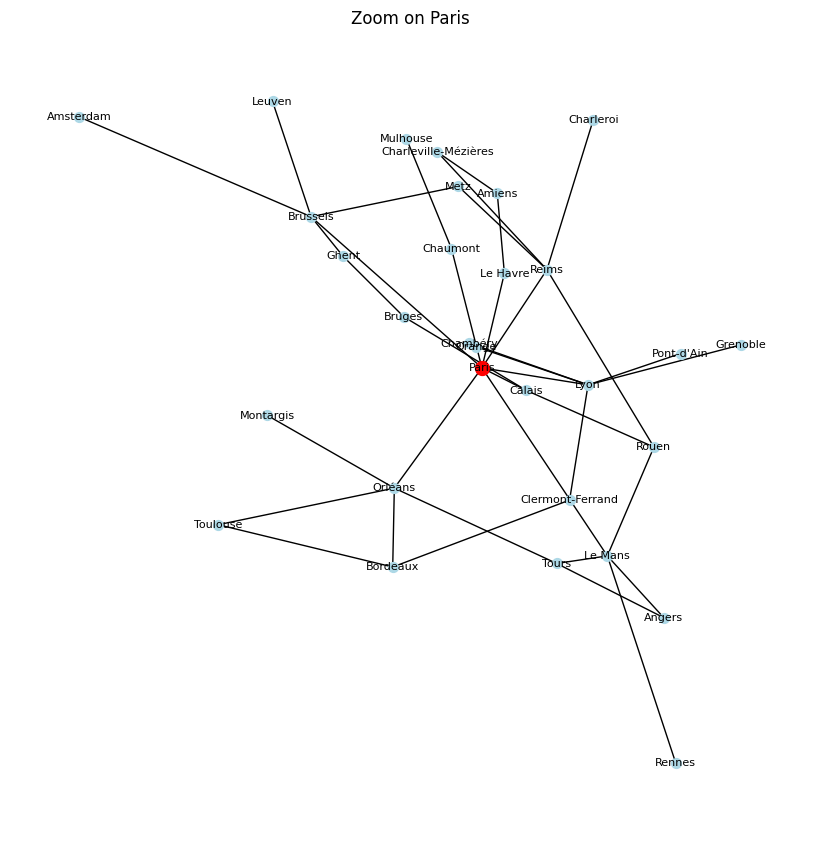

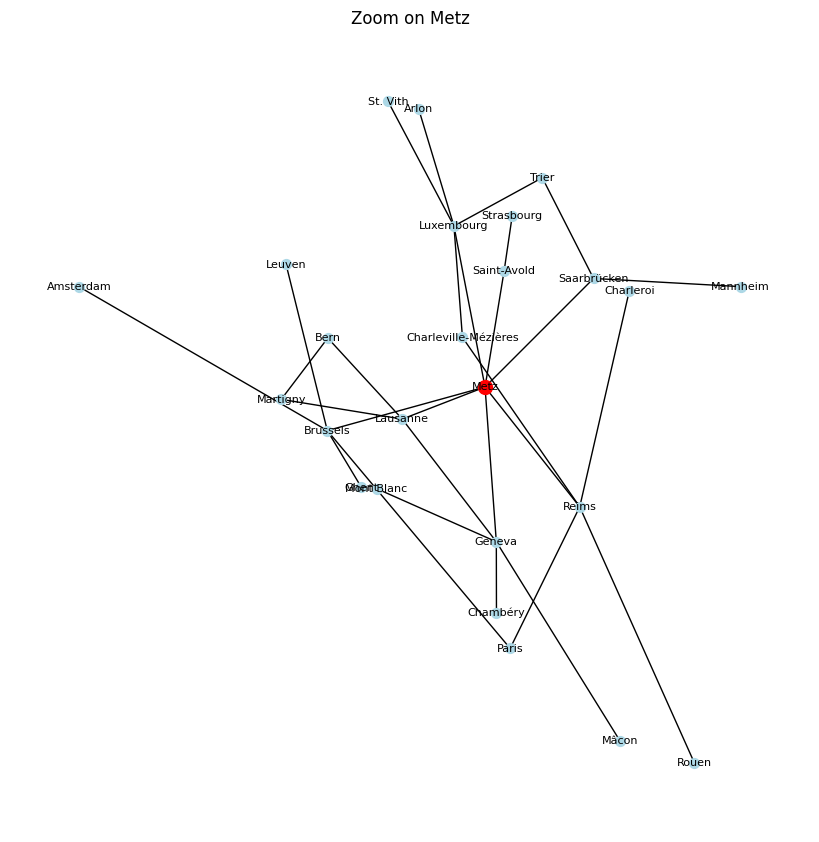

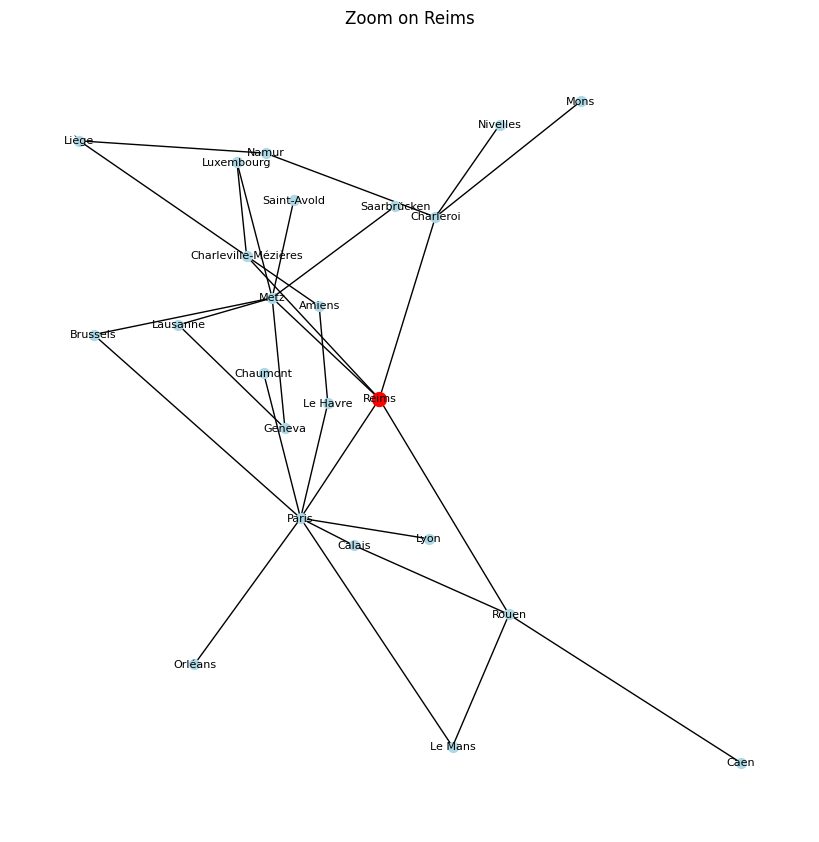

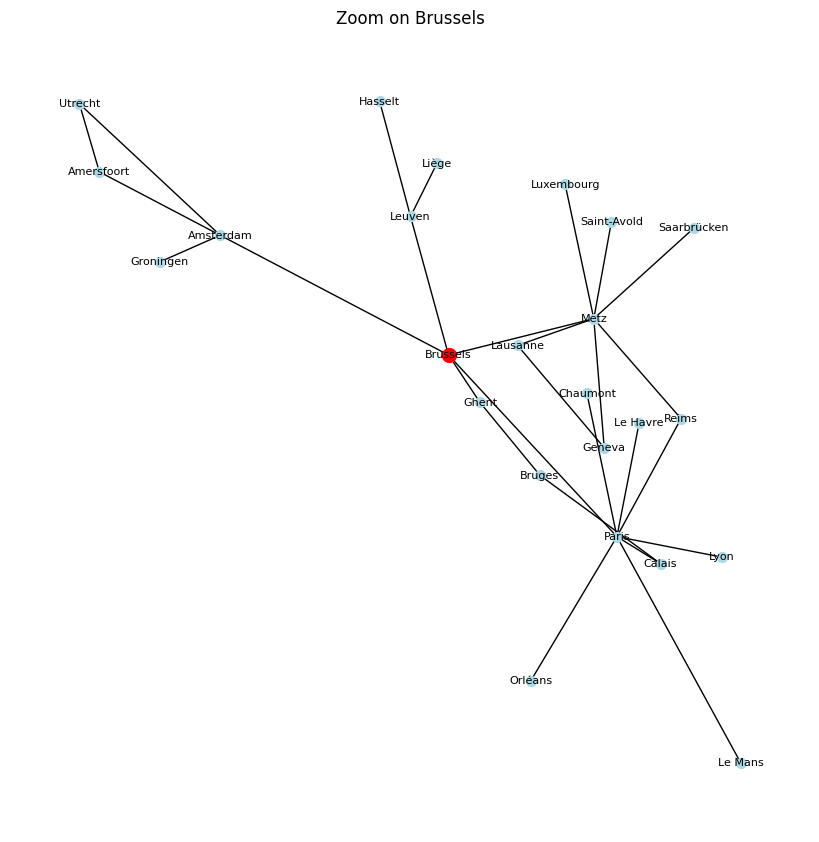

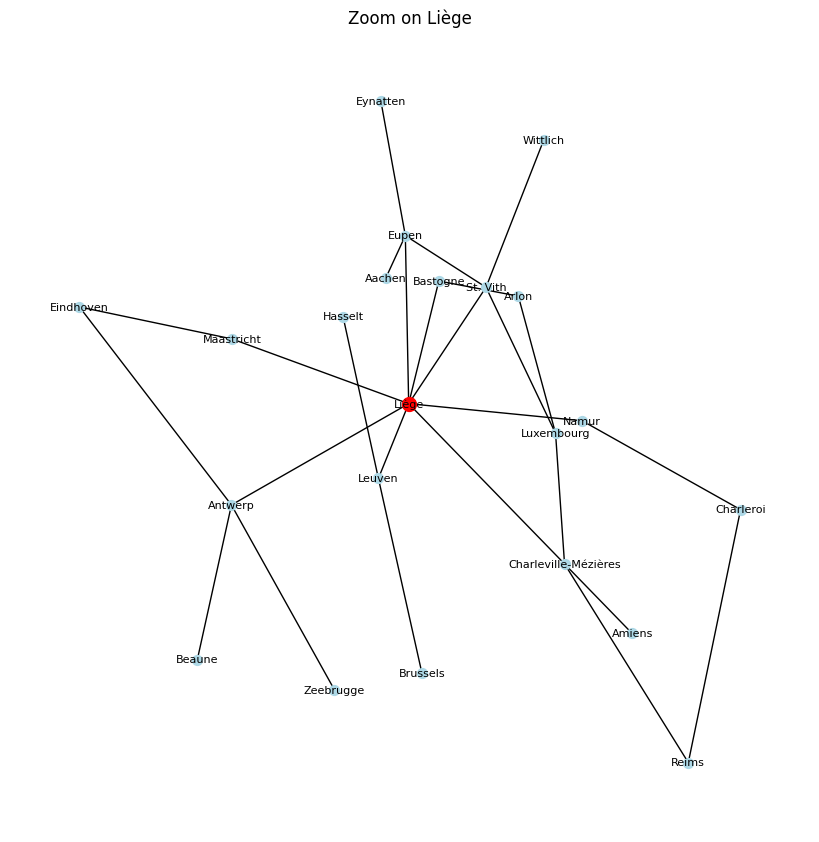

In [33]:
highlight_and_zoom(G, pos, EC_nodes)

## Degree distribution

In [14]:
degrees = [d for n, d in G.degree()]

In [15]:
degree_count = Counter(degrees)
deg, freq = zip(*degree_count.items())


In [16]:
deg = np.array(deg)
freq = np.array(freq)

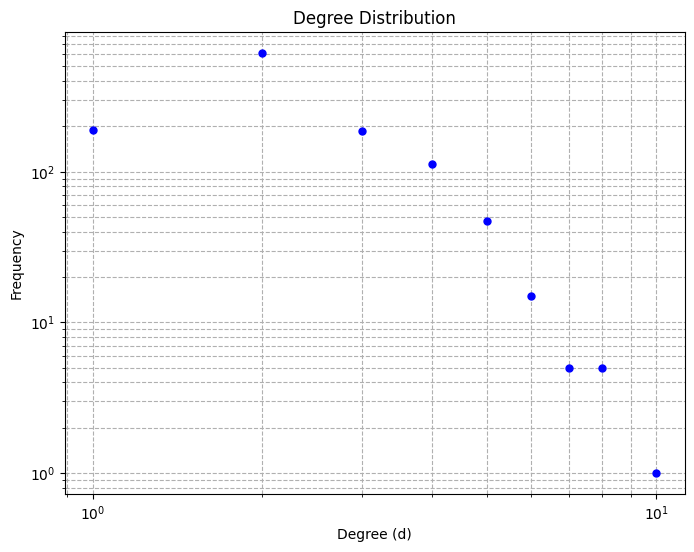

In [17]:
plt.figure(figsize=(8, 6))
plt.loglog(deg, freq, 'bo', markersize=5)
plt.title("Degree Distribution")
plt.xlabel("Degree (d)")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--")
plt.show()

## Community detection

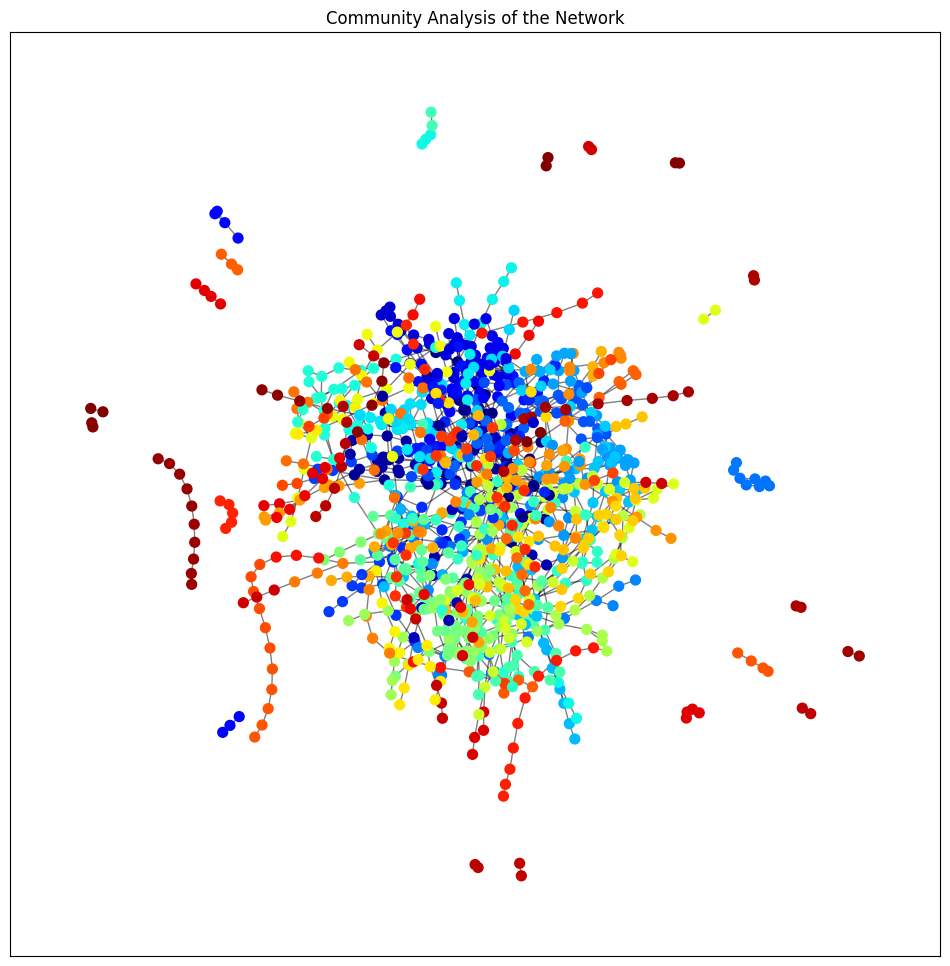

In [18]:
communities = list(label_propagation_communities(G))
community_map = {node: community_id for community_id, nodes in enumerate(communities) for node in nodes}

colors = [community_map[node] for node in G.nodes()]
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.get_cmap('jet'), node_color=colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Analysis of the Network")
plt.show()


In [19]:
for community_id, nodes in enumerate(communities):
    print(f"Community {community_id}: {nodes}")

Community 0: {'Greenock', 'Edinburgh', 'Glasgow'}
Community 1: {'Birmingham', 'Southampton', 'Cambridge', 'Preston'}
Community 2: {'Amiens', 'Le Havre', 'Maastricht', 'Charleville-Mézières', 'Liège'}
Community 3: {'Paris', 'Rouen', 'Angers', 'Orléans', 'Saint-Brieuc', 'Chaumont', 'Le Mans', 'Reims', 'Tours', 'Caen', 'Calais'}
Community 4: {'Lyon', "Pont-d'Ain"}
Community 5: {'Brussels', 'Amsterdam', 'Ghent'}
Community 6: {'Angoulême', 'Bordeaux', 'Limoges'}
Community 7: {'Montargis', 'Auxerre'}
Community 8: {'Nice', 'Toulouse', 'Cuneo', 'Brescia', 'Milan', 'Genoa', 'Tortona'}
Community 9: {'Logroño', 'San Sebastián', 'Bilbao'}
Community 10: {'Clermont-Ferrand', 'Montpellier'}
Community 11: {'Lisbon', 'Madrid', 'Valladolid', 'Burgos'}
Community 12: {'Algeciras', 'Salamanca', 'Seville', 'Mérida'}
Community 13: {'Barcelona', 'Castellón de la Plana', 'Tarragona'}
Community 14: {'Alicante', 'Valencia', 'Murcia'}
Community 15: {'Castro Marim', 'Albufeira', 'Huelva'}
Community 16: {'Málaga', 

In [20]:
num_communities = len(communities)
print(f"Number of communities detected: {num_communities}")

Number of communities detected: 406
